# Closed system simulation with experimental data markers

In this simulation we have a system of 5 liters in which we start with Next = 1000/500/200, some Nint (measured) of some mass (m). After this we "feed" for a period of 7/3.5/2.33 days, i.e. solve the "feeding" part of the simulation. After that, we add 1000/500/200 uM to the last value of Next and keep "feeding". After one duration (7 days) we reset the water, mass and the amplitude to the beginning of the first cycle. The only difference from the t_0 is the Nint which is accumulating all the effects through the time. The mass is reset to m_0 and Next is reset to 1000 ppm (per something per something)


In [1]:
# N_simulation
from __future__ import division
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import pandas as pd # to read excel
%matplotlib inline

from myfunctions import *

import datetime
# from datetime import datetime

In [2]:
# Import data and parameters

xl = pd.ExcelFile('../data/Parameters.xlsx')
x2 = pd.ExcelFile('../data/Data.xlsx')

df1 = xl.parse('Parameters',header=None)
df2 = x2.parse('Indoor')#header=None)


# assigmment of parameters to values: 
for key,val in zip(df1.iloc[:][0],df1.iloc[:][1]):
    exec(key + '=val')
    print(key,val)

# Build a for loop and for each treatment define amplitude and period 
Amplitude = 500
Period = 3.5

Parameter Indoor_value
umol_to_percent_DW 0.0014
n_days 7
Duration 7
Nint0 1.85
m0 0.15
Nintcrit 2.002
miu 0.027
Nintmax 4.2
Nintmin 0.7
Ks 14
Vmax 60
Z 0.178
KI 20
K0 1.5
Ka 0.15
Topt 18
Tmin 5
Tmax 31.5
n 2
losses20 0.0016
teta 1.047
Sopt 18
Smin 0
Smax 45
Shigh 30
Slow 12
KN 1.1
dNextoutdt 0
dNextindt 0
dmoutdt 0


In [3]:
# Convert Time into hours

T = []
for i in df2['Sample'][:]:
    T1 = df2['Timei'][df2['Sample'].values.tolist().index(i)]
    T2 = df2['Time'][df2['Sample'].values.tolist().index(i)]
    T.append(Time_to_Hours(T1,T2))
df2['T'] = T


Treatment: 1000/1/168
Number of samples:
m: 102 Nint: 54 Next: 37
7.0
0.0
Starting point
168.0
Duration
336.0
Duration

Treatment: 500/2/168
Number of samples:
m: 149 Nint: 65 Next: 126
3.5
0.0
Starting point
84.0
Period
168.0
Duration
252.0
Period
336.0
Duration
420.0
Period

Treatment: 500/3/168
Number of samples:
m: 52 Nint: 26 Next: 35
2.3333333333333335
0.0
Starting point
56.0
Period
112.0
Period
168.0
Duration
224.0
Period
280.0
Period
336.0
Duration
392.0
Period
448.0
Period

Treatment: 2000/1/168
Number of samples:
m: 18 Nint: 18 Next: 9
7.0
0.0
Starting point
168.0
Duration
336.0
Duration

Treatment: 200/5/168
Number of samples:
m: 18 Nint: 5 Next: 6
1.4
0.0
Starting point
34.0
Period
68.0
Period
102.0
Period
136.0
Period
170.0
Duration
204.0
Period
238.0
Period
272.0
Period
306.0
Period
340.0
Duration
374.0
Period
408.0
Period
442.0
Period
476.0
Period


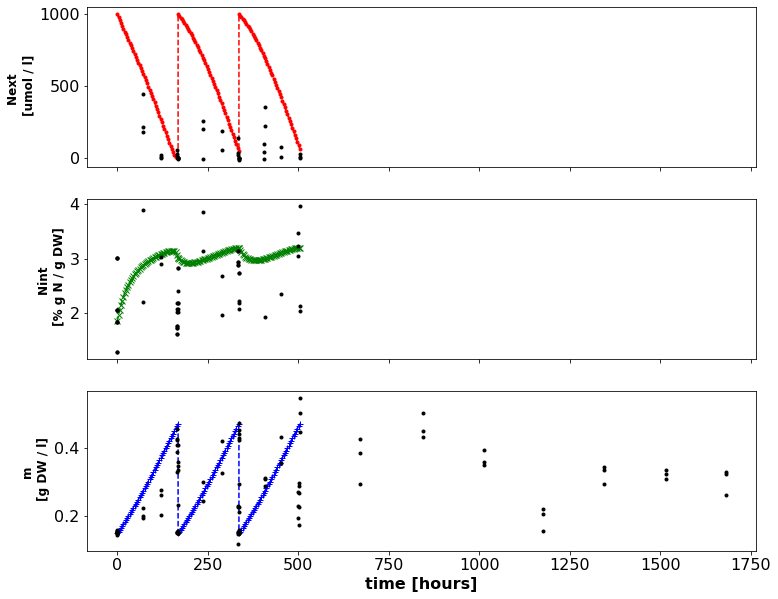

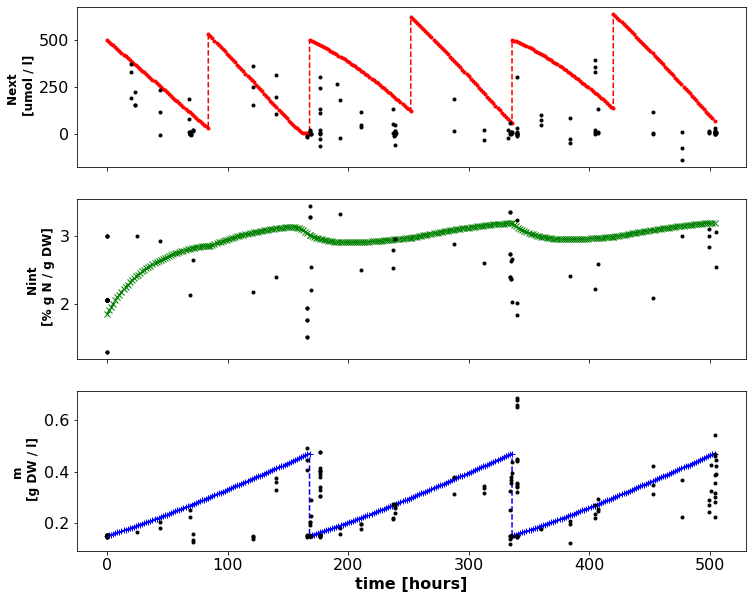

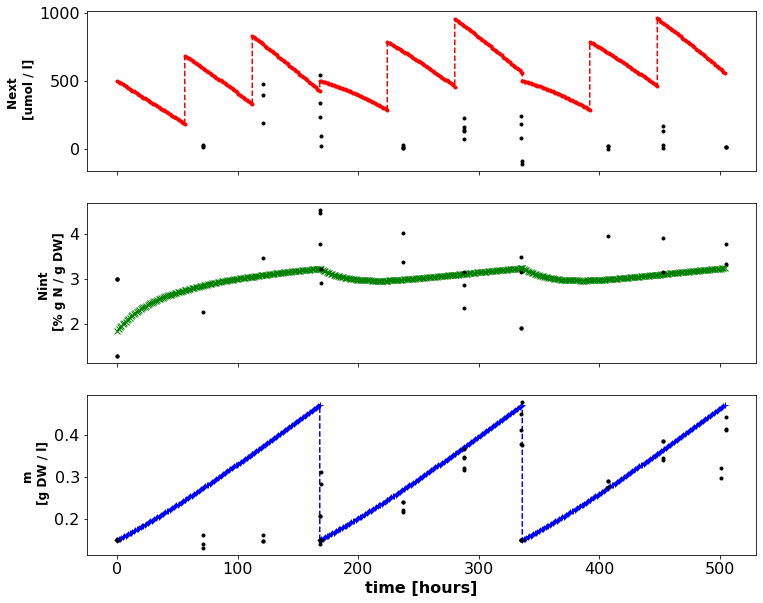

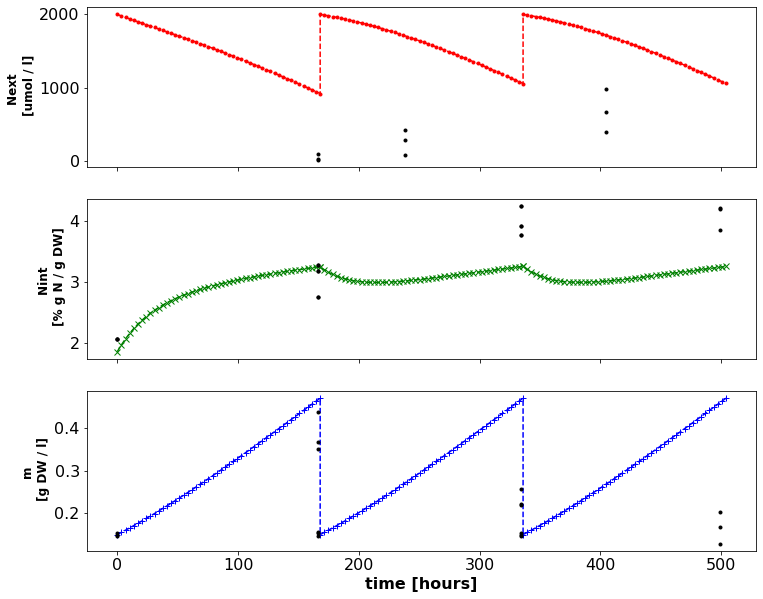

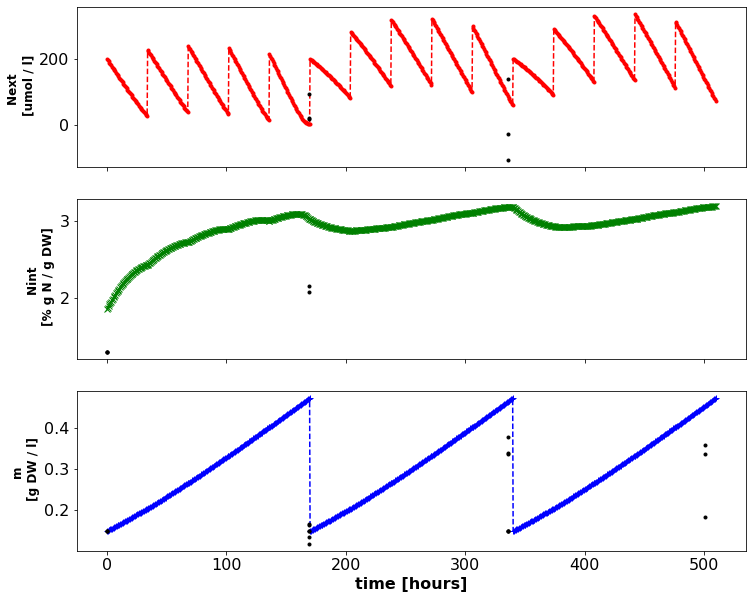

In [4]:
# model simulations and measured data for the different treatments - fix problem with time (x axis) in 1000/1/168

Treatments = ['1000/1/168','500/2/168','500/3/168','2000/1/168','200/5/168']

Temp = 22
I0 = 80
S = 20 # fix salinity function and S=40

for i in Treatments:
    print('\nTreatment: ' + str(i))
    df2Temp = df2[(df2.Treatment == i)]
    mTemp = df2Temp[(np.isnan(df2Temp.DW) != True)]['DW']
    mTimeTemp = df2Temp[(np.isnan(df2Temp.DW) != True)]['T']
    #print(mTimeTemp)
    NintTemp = df2Temp[(np.isnan(df2Temp.N) != True)]['N']
    NintTimeTemp = df2Temp[(np.isnan(df2Temp.N) != True)]['T']
    NextTemp = df2Temp[(np.isnan(df2Temp.NH4) != True)]['NH4']
    NextTimeTemp = df2Temp[(np.isnan(df2Temp.NH4) != True)]['T']
    mTemp = df2Temp[(~np.isnan(df2Temp.DW))]['DW']
    mTimeTemp = df2Temp[(~np.isnan(df2Temp.DW))]['T']
    NintTemp = df2Temp[(~np.isnan(df2Temp.N))]['N']
    NintTimeTemp = df2Temp[(~np.isnan(df2Temp.N))]['T']
    NextTemp = df2Temp[(~np.isnan(df2Temp.NH4))]['NH4']
    NextTimeTemp = df2Temp[(~np.isnan(df2Temp.NH4))]['T']
    print('Number of samples:\nm: ' + str(len(mTimeTemp)) + ' Nint: ' + str(len(NintTimeTemp)) + ' Next: ' + str(len(NextTimeTemp)))
    
    Tr = []
    Tr = i.split('/')
    Tr = [float(i) for i in Tr]
    Amplitude = Tr[0]
    Period = float(7/Tr[1])
    print(Period)
    Duration = Tr[2]/24
    
    NEXT, NINT, M, T = [],[],[],[]

    n_days = Duration*3
    count_periods = 0
    
    for hour in np.arange(0,n_days*24,round(Period*24,0)):
        print(hour)
        if hour == 0:
            print('Starting point')
            Nint_0 = Nint0
            m_0 = m0
            Next_0 = Amplitude

        if hour > 0 and np.mod(hour,round(Period*24,0)) == 0:
            count_periods = count_periods + 1
            
            if count_periods == Tr[1]:
                print('Duration')
                # reset everything, except Nint
                Nint_0 = NINT[-1][-1]
                Next_0 = Amplitude
                m_0 = m0
                count_periods = 0

            else:
                # period passed, not Duration
                # add amplitude, keep going 
                print('Period')
                Next_0 = NEXT[-1][-1] + Amplitude
                Nint_0 = NINT[-1][-1]
                m_0 = M[-1][-1]


        # setup initial conditions
        x0 = [Next_0,Nint_0,m_0]
        #print('hour is equel: ' + str(hour))
        #print('Period is equel: ' + str(Period))
        t = np.linspace(hour,hour+Period*24)

        x = odeint(controlled_N_new,x0,t,args=(Nintmax,Nintmin,Vmax,Ks,dNextoutdt,dNextindt,miu,dmoutdt,Nintcrit,S,Z,KI,K0,Ka,
                                               Topt,Tmin,Tmax,losses20,teta,Sopt,Smin,Smax,n,umol_to_percent_DW,Temp,I0))

        NEXT.append(x[: , 0])
        NINT.append(x[: , 1])
        M.append(x[: , 2])
        T.append(t)

        t_model = np.hstack(T)
        Next_model = np.hstack(NEXT)
        Nint_model = np.hstack(NINT)
        m_model = np.hstack(M)
        
    plot_result(t_model,Next_model,Nint_model,m_model,Nint=NintTemp,tNint=NintTimeTemp,m=mTemp,tm=mTimeTemp,Next=NextTemp,tNext=NextTimeTemp)

In [ ]:
# build a different code for 4 hours fertilization ('feeding' and then 'growing')

In [ ]:
# mark measurements from different experiments in different colors, like in Hue from Seaborn - need to change in plot_result function



In [ ]:
# All weight measurements
# adjust model to 'Treatment' - take amplitude, period and duration from treatment name and turn into an int
# solve issue of unequal durations

Treatments = ['1000 / 7 / 168','500 / 3.5 / 168','500 / 2.3 / 168','2000 / 7 / 4','2000 / 7 / 168','500 / 7 / 4','200 / 1.4 / 168']
#Treatments = ['1000 / 1 / 168','500 / 2 / 168','500 / 3 / 168','2000 / 1 / 4','2000 / 1 / 168','500 / 1 / 4','200 / 5 / 168']

for i in Treatments:
    print('\nTreatment: ' + str(i))
    df2Temp = df2[(df2.Treatment == i)]
    mTemp = df2Temp[(~np.isnan(df2Temp.DW))]['DW']
    mTimeTemp = df2Temp[(~np.isnan(df2Temp.DW))]['T']
    NintTemp = df2Temp[(~np.isnan(df2Temp.N))]['N']
    NintTimeTemp = df2Temp[(~np.isnan(df2Temp.N))]['T']
    NextTemp = df2Temp[(np.isnan(df2Temp.NH4) != True)]['NH4']
    NextTimeTemp = df2Temp[(np.isnan(df2Temp.NH4) != True)]['T']
    print('Number of samples:\nm: ' + str(len(mTimeTemp)) + ' Nint: ' + str(len(NintTimeTemp)) + ' Next: ' + str(len(NextTimeTemp)))
    
    Tr = []
    Tr = i.split('/')
    Tr = [float(i) for i in Tr]
    Amplitude = Tr[0]
    Period = Tr[1]
    Duration = Tr[2]/24
    
    NEXT, NINT, M, T = [],[],[],[]

    n_days = Duration*3

df2Temp = df2[(np.isnan(df2.DW) != True)][(df2.Comment != 'Time effect')][(df2.Comment != 'Starvation')][(df2.Treatment != 'Acclimation')]
df2Temp.plot.scatter(x = 'T', y = 'DW')#hue = 'Treatment')

In [ ]:
# adjust data summary to new code:

In [ ]:
# model simulations and measured data for offshore experiments

# T and I data from Hobo / IMS
# show results per experiment

In [ ]:
# model simulations and measured data for outdoor sleeve experiments

# T and I data from Hobo
# no need to show graphs - just calculate the difference between projected and measured growth

In [ ]:
# model simulations and measured data for the different treatments - fix problem with time (x axis) in 1000/1/168

Treatments = ['1000/1/168','500/2/168','500/3/168','2000/1/168','200/5/168']

Temp = 22
I0 = 80
S = 20 # fix salinity function and S=40

for i in Treatments:
    print('\nTreatment: ' + str(i))
    df2Temp = df2[(df2.Treatment == i)]
    mTemp = df2Temp[(np.isnan(df2Temp.DW) != True)]['DW']
    mTimeTemp = df2Temp[(np.isnan(df2Temp.DW) != True)]['T']
    #print(mTimeTemp)
    NintTemp = df2Temp[(np.isnan(df2Temp.N) != True)]['N']
    NintTimeTemp = df2Temp[(np.isnan(df2Temp.N) != True)]['T']
    mTemp = df2Temp[(~np.isnan(df2Temp.DW))]['DW']
    mTimeTemp = df2Temp[(~np.isnan(df2Temp.DW))]['T']
    NintTemp = df2Temp[(~np.isnan(df2Temp.N))]['N']
    NintTimeTemp = df2Temp[(~np.isnan(df2Temp.N))]['T']
    NextTemp = df2Temp[(np.isnan(df2Temp.NH4) != True)]['NH4']
    NextTimeTemp = df2Temp[(np.isnan(df2Temp.NH4) != True)]['T']
    print('Number of samples:\nm: ' + str(len(mTimeTemp)) + ' Nint: ' + str(len(NintTimeTemp)) + ' Next: ' + str(len(NextTimeTemp)))
    
    Tr = []
    Tr = i.split('/')
    Tr = [float(i) for i in Tr]
    Amplitude = Tr[0]
    Period = float(7/Tr[1])
    print(Period)
    Duration = Tr[2]/24
    
    NEXT, NINT, M, T = [],[],[],[]

    n_days = Duration*3
    count_periods = 0
    
    for hour in np.arange(0,n_days*24,round(Period*24,0)):
        print(hour)
        if hour == 0:
            print('Starting point')
            Nint_0 = Nint0
            m_0 = m0
            Next_0 = Amplitude

        if hour > 0 and np.mod(hour,round(Period*24,0)) == 0:
            count_periods = count_periods + 1
            
            if count_periods == Tr[1]:
                print('Duration')
                # reset everything, except Nint
                Nint_0 = NINT[-1][-1]
                Next_0 = Amplitude
                m_0 = m0
                count_periods = 0

            else:
                # period passed, not Duration
                # add amplitude, keep going 
                print('Period')
                Next_0 = NEXT[-1][-1] + Amplitude
                Nint_0 = NINT[-1][-1]
                m_0 = M[-1][-1]


        # setup initial conditions
        x0 = [Next_0,Nint_0,m_0]
        #print('hour is equel: ' + str(hour))
        #print('Period is equel: ' + str(Period))
        t = np.linspace(hour,hour+Period*24)

        x = odeint(controlled_N_new,x0,t,args=(Nintmax,Nintmin,Vmax,Ks,dNextoutdt,dNextindt,miu,dmoutdt,Nintcrit,S,Z,KI,K0,Ka,
                                               Topt,Tmin,Tmax,losses20,teta,Sopt,Smin,Smax,n,umol_to_percent_DW,Temp,I0))

        NEXT.append(x[: , 0])
        NINT.append(x[: , 1])
        M.append(x[: , 2])
        T.append(t)

        t_model = np.hstack(T)
        Next_model = np.hstack(NEXT)
        Nint_model = np.hstack(NINT)
        m_model = np.hstack(M)
        
    plot_result(t_model,Next_model,Nint_model,m_model,Nint=NintTemp,tNint=NintTimeTemp,m=mTemp,tm=mTimeTemp,Next=NextTemp,tNext=NextTimeTemp)

In [ ]:
df2

In [ ]:
df2.plot.scatter(x = 'T', y = 'mm')

In [ ]:
df2.head()

In [ ]:
df2.tail()

In [ ]:
# find out how many experiments are in the file
n_exp = df2['day i'].dropna().shape[0] # number of items that have day i property and not NaN

# it should be equal to the number of day f - just for a test. will pop an error if the file is corrupted
assert (n_exp == df2['day f'].dropna().shape[0])

print('N of experiments = {}'.format(n_exp))

In [ ]:
day_i = df2['day i'].dropna()
day_i.astype('S')

In [ ]:
# find out the sleeve number in each experiment
sleeves = df2['sleeve'].dropna().astype(int)
for s in sleeves:
    print('sleeve {}'.format(s))

In [ ]:
ind_Nint = df2.index[df2['parameter'] == 'Nint'] # find index of the Nint rows
print(ind_Nint) # print it for the reference, these are rows 2, 6 and 10

# small test
assert(len(ind_Nint) == n_exp) # if we found less Nint than experiments, then something is wrong


df2.iloc[ind_Nint[1],4:].dropna() # take the 2nd element of that index, i.e. 2nd experiment and show the data:

## Read the experimental data from the same file, second sheet